## Predicting the Car Accident’s Severity

## Introduction

. In this case, we need to create a model that will be able to predict the severity based on the condition mentioned and review what is the most important factor influencing the severity and frequency of the accident.

## Data Understanding

The data was downloaded from the example data set on first week part of the capstone project. Furthermore, we need to export, clean, and the data to make it ready to be fed on machine learning algorithm. We need to remove unecessary columns as well.

## Data Preparation

There are steps need to be done for data preparation. They are exporting the library and data, removing unecessary columns, removing NaN reading, labelling the data, changing the data type plus balancing the data. The details of the steps were explained below:

## Exporting The Required Library

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
%matplotlib inline

## Exporting The Data to Notebook

In [13]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.info()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

## Displaying The Dataset Head

In [14]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Removing Unecessary Columns

In [15]:
df.drop(columns = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',  'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], inplace=True)
df.head()

,SEVERITYCODE,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,2,Overcast,Wet,Daylight
1,1,2,Raining,Wet,Dark - Street Lights On
2,1,3,Overcast,Dry,Daylight
3,1,3,Clear,Dry,Daylight
4,2,2,Raining,Wet,Daylight


## Checking NaN Values

In [16]:
print(df.isnull().sum())

SEVERITYCODE       0
VEHCOUNT           0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64


## Removing NaN Values

In [17]:
df.dropna(inplace=True)

## Checking The Availability of Nan Values after Removing It

In [18]:
print(df.isnull().sum())

SEVERITYCODE    0
VEHCOUNT        0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64


## Get Dummies to Label The Data

In [19]:
pd.get_dummies(data=df, columns=['SEVERITYCODE'])

,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE_1,SEVERITYCODE_2
0,2,Overcast,Wet,Daylight,0,1
1,2,Raining,Wet,Dark - Street Lights On,1,0
2,3,Overcast,Dry,Daylight,1,0
3,3,Clear,Dry,Daylight,1,0
4,2,Raining,Wet,Daylight,0,1
5,2,Clear,Dry,Daylight,1,0
6,2,Raining,Wet,Daylight,1,0
7,1,Clear,Dry,Daylight,0,1
8,2,Clear,Dry,Daylight,1,0
9,2,Clear,Dry,Daylight,0,1


In [20]:
pd.get_dummies(data=df, columns=['WEATHER'])

,SEVERITYCODE,VEHCOUNT,ROADCOND,LIGHTCOND,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown
0,2,2,Wet,Daylight,0,0,0,0,1,0,0,0,0,0,0
1,1,2,Wet,Dark - Street Lights On,0,0,0,0,0,0,1,0,0,0,0
2,1,3,Dry,Daylight,0,0,0,0,1,0,0,0,0,0,0
3,1,3,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0
4,2,2,Wet,Daylight,0,0,0,0,0,0,1,0,0,0,0
5,1,2,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0
6,1,2,Wet,Daylight,0,0,0,0,0,0,1,0,0,0,0
7,2,1,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0
8,1,2,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0
9,2,2,Dry,Daylight,0,1,0,0,0,0,0,0,0,0,0


In [21]:
pd.get_dummies(data=df, columns=['ROADCOND'])

,SEVERITYCODE,VEHCOUNT,WEATHER,LIGHTCOND,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet
0,2,2,Overcast,Daylight,0,0,0,0,0,0,0,0,1
1,1,2,Raining,Dark - Street Lights On,0,0,0,0,0,0,0,0,1
2,1,3,Overcast,Daylight,1,0,0,0,0,0,0,0,0
3,1,3,Clear,Daylight,1,0,0,0,0,0,0,0,0
4,2,2,Raining,Daylight,0,0,0,0,0,0,0,0,1
5,1,2,Clear,Daylight,1,0,0,0,0,0,0,0,0
6,1,2,Raining,Daylight,0,0,0,0,0,0,0,0,1
7,2,1,Clear,Daylight,1,0,0,0,0,0,0,0,0
8,1,2,Clear,Daylight,1,0,0,0,0,0,0,0,0
9,2,2,Clear,Daylight,1,0,0,0,0,0,0,0,0


In [22]:
pd.get_dummies(data=df, columns=['LIGHTCOND'])

,SEVERITYCODE,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,2,Overcast,Wet,0,0,0,0,0,1,0,0,0
1,1,2,Raining,Wet,0,0,1,0,0,0,0,0,0
2,1,3,Overcast,Dry,0,0,0,0,0,1,0,0,0
3,1,3,Clear,Dry,0,0,0,0,0,1,0,0,0
4,2,2,Raining,Wet,0,0,0,0,0,1,0,0,0
5,1,2,Clear,Dry,0,0,0,0,0,1,0,0,0
6,1,2,Raining,Wet,0,0,0,0,0,1,0,0,0
7,2,1,Clear,Dry,0,0,0,0,0,1,0,0,0
8,1,2,Clear,Dry,0,0,0,0,0,1,0,0,0
9,2,2,Clear,Dry,0,0,0,0,0,1,0,0,0


## Data Labelling

In [23]:
df.loc[(df['WEATHER'] == 'Blowing Sand/Dirt'), 'WEATHER'] = 0
df.loc[(df['WEATHER'] == 'Clear'), 'WEATHER'] = 1
df.loc[(df['WEATHER'] == 'Fog/Smog/Smoke'), 'WEATHER'] = 2
df.loc[(df['WEATHER'] == 'Other'), 'WEATHER'] = 3
df.loc[(df['WEATHER'] == 'Overcast'), 'WEATHER'] = 4
df.loc[(df['WEATHER'] == 'Partly Cloudy'), 'WEATHER'] = 5
df.loc[(df['WEATHER'] == 'Severe Crosswind'), 'WEATHER'] = 6
df.loc[(df['WEATHER'] == 'Sleet/Hail/Freezing Rain'), 'WEATHER'] = 7
df.loc[(df['WEATHER'] == 'Snowing'), 'WEATHER'] = 8
df.loc[(df['WEATHER'] == 'Unknown'), 'WEATHER'] = 9
df.loc[(df['WEATHER'] == 'Raining'), 'WEATHER'] = 10

In [24]:
df.loc[(df['ROADCOND'] == 'Dry'), 'ROADCOND'] = 0
df.loc[(df['ROADCOND'] == 'Ice'), 'ROADCOND'] = 1
df.loc[(df['ROADCOND'] == 'Oil'), 'ROADCOND'] = 2
df.loc[(df['ROADCOND'] == 'Other'), 'ROADCOND'] = 3
df.loc[(df['ROADCOND'] == 'Sand/Mud/Dirt'), 'ROADCOND'] = 4
df.loc[(df['ROADCOND'] == 'Snow/Slush'), 'ROADCOND'] = 5
df.loc[(df['ROADCOND'] == 'Standing Water'), 'ROADCOND'] = 6
df.loc[(df['ROADCOND'] == 'Unknown'), 'ROADCOND'] = 7
df.loc[(df['ROADCOND'] == 'Wet'), 'ROADCOND'] = 8

In [25]:
df.loc[(df['LIGHTCOND'] == 'Dark - No Street Lights'), 'LIGHTCOND'] = 0
df.loc[(df['LIGHTCOND'] == 'Dark - Street Lights Off'), 'LIGHTCOND'] = 1
df.loc[(df['LIGHTCOND'] == 'Dark - Street Lights On'), 'LIGHTCOND'] = 2
df.loc[(df['LIGHTCOND'] == 'Dark - Unknown Lighting'), 'LIGHTCOND'] = 3
df.loc[(df['LIGHTCOND'] == 'Dawn'), 'LIGHTCOND'] = 4
df.loc[(df['LIGHTCOND'] == 'Daylight'), 'LIGHTCOND'] = 5
df.loc[(df['LIGHTCOND'] == 'Dusk'), 'LIGHTCOND'] = 6
df.loc[(df['LIGHTCOND'] == 'Other'), 'LIGHTCOND'] = 7
df.loc[(df['LIGHTCOND'] == 'Unknown'), 'LIGHTCOND'] = 8

## Changing The Data Type

In [26]:
df['WEATHER'] = df['WEATHER'].astype(int)
df['ROADCOND'] = df['ROADCOND'].astype(int)
df['LIGHTCOND'] = df['LIGHTCOND'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189337 entries, 0 to 194672
Data columns (total 5 columns):
SEVERITYCODE    189337 non-null int64
VEHCOUNT        189337 non-null int64
WEATHER         189337 non-null int64
ROADCOND        189337 non-null int64
LIGHTCOND       189337 non-null int64
dtypes: int64(5)
memory usage: 8.7 MB


## Balancing The Data

The data distribution and balance need to be checked as if it was not distributed correctly, it may give the wrong prediction based on machine learning model. Hence, we need to do data balancing and data standardization based on the number of each severity category.

In [28]:
df2=df['SEVERITYCODE']

In [29]:
df3=df2.value_counts()
df3

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

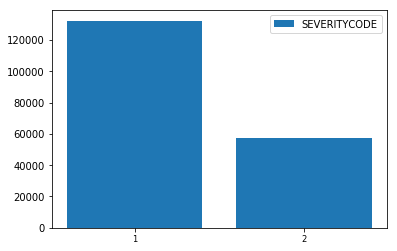

In [30]:
plt.bar(range(len(df3)), df3.values, align='center', label='SEVERITYCODE')
plt.xticks(range(len(df3)), df3.index.values, size='small', label='count')
plt.legend()
plt.show()

Based on the histogram above, the severity code in class 1 is nearly three time the size of class 2. We can fix this by downsampling the majority class.

Furthermore, we need to do downsample on majority class as shown on the code below:

In [31]:
from sklearn.utils import resample

In [32]:
# Separate majority and minority classes
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=57052,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

The number of data after doing downsampling on majority class, perfectly balanced as shown above.

## Methodology and Result

In this project, we used correlation matrix to find the most influencing factor on severity class and the frequency on accident. This is proven by building a histogram later. This is done by finding correlation coefficient between two parameters for all parameters on the dataset. The target of doing this process is knowing what kind of factor influencing the risk of accident represented by the severity code. This part was done as exploratory data analysis. Correlation matrix has been done as shown on the code below:

,SEVERITYCODE,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
SEVERITYCODE,1.000000,-0.078667,-0.064129,-0.053807,-0.069152
VEHCOUNT,-0.078667,1.000000,-0.012531,-0.013101,0.042109
WEATHER,-0.064129,-0.012531,1.000000,0.825706,0.019084
ROADCOND,-0.053807,-0.013101,0.825706,1.000000,-0.011944
LIGHTCOND,-0.069152,0.042109,0.019084,-0.011944,1.000000


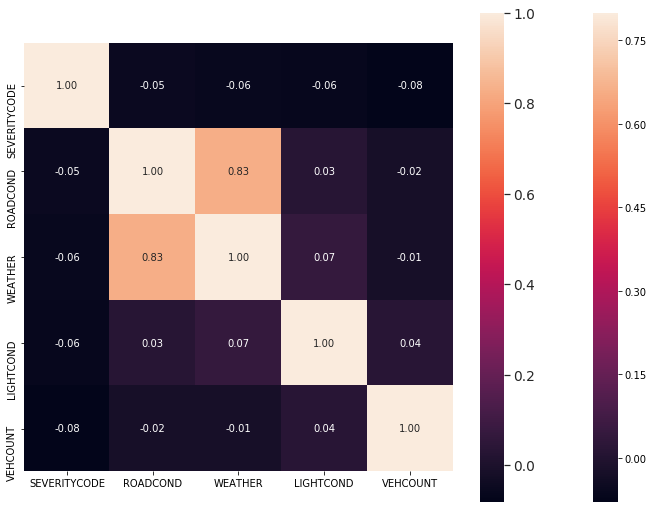

In [33]:
corrmat = df_downsampled.corr()
display(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SEVERITYCODE')['SEVERITYCODE'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The histogram can be shown using the code below:

In [30]:
df_downsampled.groupby(['SEVERITYCODE','VEHCOUNT'])['SEVERITYCODE'].agg({'Frequency':'count'})

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


Frequency
SEVERITYCODE VEHCOUNT           
1            0                 1
             1              5097
             2             48010
             3              3208
             4               565
             5               124
             6                34
             7                 8
             8                 4
             11                1
2            0               195
             1             14070
             2             35893
             3              5460
             4              1076
             5               261
             6                59
             7                22
             8                 5
             9                 6
             10                2
             11                3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f697d8fbcc0>,
      dtype=object)

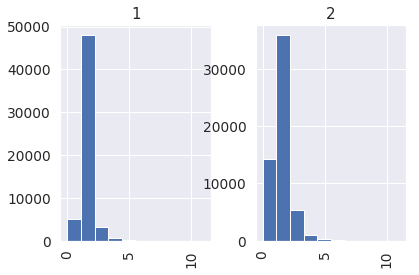

In [31]:
df_downsampled['VEHCOUNT'].hist(by=df_downsampled['SEVERITYCODE'])

As shown on the histogram above, the number of accidents has reversed relationship relatively with the severity code. That means the number of vehicles involved on the accident increase along the reduction of accident frequency. More accident happened on the severity class 1.

Moreover, we use the final dataset which has been prepared to be fed into machine learning models. We will use the following models:
a.	KNN (K-Nearest Neighbour)
KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

b.	Decision Tree
A decision tree is a mechanical way to make a decision by dividing the inputs into smaller decisions. Like other models, it involves mathematics. But it’s not very complicated mathematics. The approach is to look at the decisions and the factors that led to that decision. It is based on the concept of entropy. This looks at the frequency distribution of decisions and then calculates a logarithm.

c.	SVM (Support Vector Machine)
Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.



d.	Logistic Regression
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no). Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc. In this case, we use binomial mode as the model will predict 2 kinds of severity code only.
Then, we will check the similarity score to choose the best models using jcard, log loss, and f1_score.


First of all, we have to standardize the dataset as shown on the code below:

In [35]:
X= preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


Before moving forward, we split the train and test data to train and test the machine learning model as 80:20. Then, we started building the machine learning model and the accuracy score as shown below:

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [37]:
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    Y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(Y_test,Y_pred)
    std_acc[n-1]=np.std(Y_pred==Y_test)/np.sqrt(Y_pred.shape[0])
    
mean_acc

array([0.59002673, 0.56934403, 0.56947548, 0.55992288, 0.5806494 ,
       0.58266509, 0.58525043, 0.58730993, 0.5879234 , 0.59484685,
       0.58823014, 0.59528504, 0.59686254, 0.59567942, 0.59239297,
       0.59274353, 0.59283116, 0.59305026, 0.59357609, 0.59265589,
       0.59410192, 0.59366373, 0.59340082, 0.5929188 , 0.59326936,
       0.59594233, 0.59331318, 0.59861531, 0.59331318, 0.59572324,
       0.59300644, 0.59559178, 0.59353227, 0.59414574, 0.59309408,
       0.59357609, 0.57692476, 0.59695018, 0.59725691, 0.59975461,
       0.59909732, 0.5994917 , 0.58240217, 0.58248981, 0.58196398,
       0.59971079, 0.58240217, 0.59971079, 0.58209544, 0.58253363])

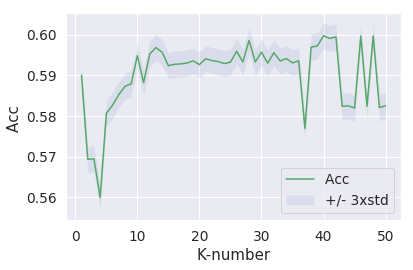

The best accuracy was with 0.5997546119801936 with k= 40


In [38]:
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Acc ', '+/- 3xstd'))
plt.ylabel('Acc ')
plt.xlabel('K-number')
plt.tight_layout()
plt.show()


print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtm = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtm.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
Y_pred=dtm.predict(X_test)
dtm_acc=metrics.accuracy_score(Y_test,Y_pred)
dtm_acc

0.6075982647561456

In [42]:
from sklearn import svm
svm_m=svm.SVC(kernel='rbf')
svm_m.fit(X_train,Y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
Y_pred=svm_m.predict(X_test)

In [44]:
metrics.accuracy_score(Y_test,Y_pred)

0.6076859033346479

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrm=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,Y_train)

In [46]:
Y_pred=lrm.predict(X_test)

In [47]:
metrics.accuracy_score(Y_test,Y_pred)

0.5405985714911704

Additionally, we had to test the similarity with the real value using the methods as shown below:

In [48]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [49]:
# ACCURACY SCORES 
# knn 
yhat = knnmodel.predict(X_test)
yhat
print("Train set KNN Accuracy: ", metrics.accuracy_score(Y, knnmodel.predict(X)))
print("Test set KNN Accuracy: ", metrics.accuracy_score(Y_test, yhat))
knn_jaccard = jaccard_similarity_score(Y_test, yhat)
knn_f1_score = f1_score(Y_test, yhat, average='weighted')

# Decission tree 
yhat = dtm.predict(X_test)
yhat
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(Y, dtm.predict(X)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(Y_test, yhat))
tree_jaccard = jaccard_similarity_score(Y_test, yhat)
tree_f1_score = f1_score(Y_test, yhat, average='weighted')

# SVM 
yhat = svm_m.predict(X_test)
yhat
print("Train set SVM Accuracy: ", metrics.accuracy_score(Y, svm_m.predict(X)))
print("Test set SVM Accuracy: ", metrics.accuracy_score(Y_test, yhat))
svm_jaccard = jaccard_similarity_score(Y_test, yhat)
svm_f1_score = f1_score(Y_test, yhat, average='weighted')

# Logistic regression 
yhat = lrm.predict(X_test)
yhat_proba = lrm.predict_proba(X_test)
yhat
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(Y, lrm.predict(X)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(Y_test, yhat))
lr_jaccard = jaccard_similarity_score(Y_test, yhat)
lr_f1_score = f1_score(Y_test, yhat, average='weighted')
lr_log_loss = log_loss(Y_test, yhat_proba)

Train set KNN Accuracy:  0.5795765266774171
Test set KNN Accuracy:  0.5825336313045002
Train set Decission Tree Accuracy:  0.6067622519806493
Test set Decission Tree Accuracy:  0.6075982647561456
Train set SVM Accuracy:  0.6081732454602818
Test set SVM Accuracy:  0.6076859033346479
Train set Logistic regression Accuracy:  0.5335132861249386
Test set Logistic regression Accuracy:  0.5405985714911704


In [50]:
report = pd.DataFrame(data=np.array([["KNN", knn_jaccard, knn_f1_score, np.nan],
                                     ["Decision Tree", tree_jaccard, tree_f1_score, np.nan],
                                    ["SVM", svm_jaccard, svm_f1_score, np.nan],
                                    ["LogisticRegression", lr_jaccard, lr_f1_score, lr_log_loss]]), columns=["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "LogLoss"])
report

,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.5825336313045002,0.5743648524368107,nan
Decision Tree,0.6075982647561456,0.5841367885192402,nan
SVM,0.6076859033346479,0.5970095476132452,nan
LogisticRegression,0.5405985714911704,0.5349526716190827,0.6846179823380177


## Discussion

After watching on the raw dataset, we could see that there were too many columns containing categorical data. We could not use all of these data to fed the machine learning models hence we simplified the dataset to consider the VEHCOUNT’, 'WEATHER', 'ROADCOND' and 'LIGHTCOND' only. Later, we gave the label to each categories on the columns and change the data type from ‘object’ to ‘integer’ or ‘float’ as the ‘object’ could not be used to fed the machine learning algorithm/models.
We could see that there were NaN values so we drop the rows containing NaN value then solve the issue with imbalance data where severity class 1 is almost three times larger than class 2. We did a downsampling on the majority class and match the minority class with 57052 values each.
Once we analyzed and cleaned the data, it was then fed through four ML models; K-Nearest Neighbor, Decision Tree, SVM  and Logistic Regression. We found that the SVM has highest similarity and accuration score as the model built using this algorithm has flexibility on any condition wherever different category was placed with minor or major conditions. When the algorithm couldn’t place a ‘plane’ between two groups, it will change the values by giving the same behaviour (for example, powering x and y values) on x and y reading till it is separated perfectly. Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for all of algorithm. 


## Conclusion

Based on historical data from vehicle count pointing to certain classes, we can conclude that the number of vehicles involved on the accident increase along the reduction of accident frequency. More accident happened on the severity class 1. In another word, the accident involving many vehicles are rarely happen.
Beside of this, the light condition was also the second strongest factor influencing the frequency of accidents. We recommend to put enough lighting on the spot where the frequency of accident is high.
